In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.utils.multiclass import unique_labels

In [52]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


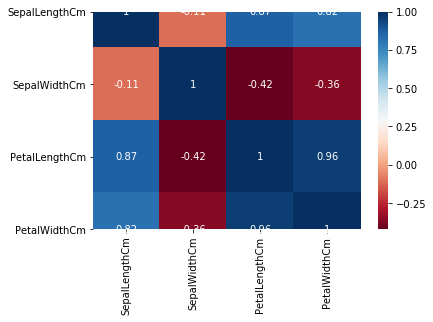

In [172]:
sns.heatmap(iris.drop("Id", axis=1).corr(), cmap="RdBu", annot=True)

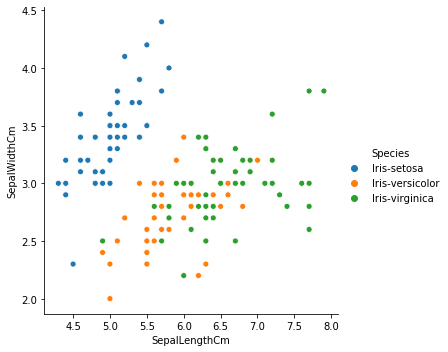

In [63]:
sns.relplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=iris)

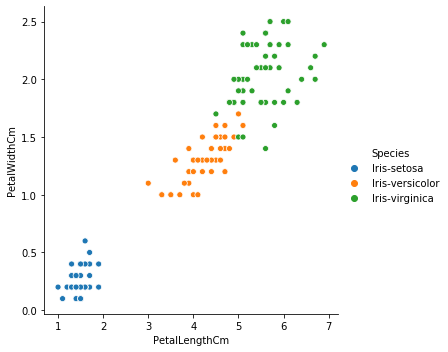

In [64]:
sns.relplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=iris)

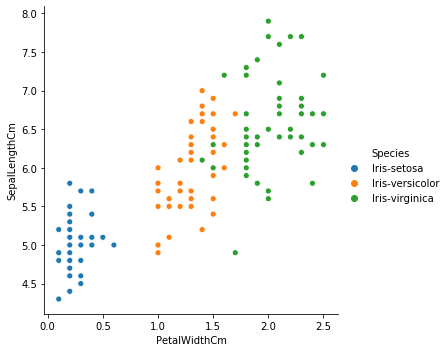

In [70]:
sns.relplot(x="PetalWidthCm", y="SepalLengthCm", hue="Species", data=iris)

In [98]:
Y = iris["Species"]
X = iris.drop("Species", axis=1)

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=9, test_size=.25)

In [112]:
def model_evaluation(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    print(str(model.__class__.__name__) + ": " + str(model.score(X_test, Y_test)))

mnb = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=3)

models = [mnb, knn]

for model in models:
    model_evaluation(model, X_train, Y_train, X_test, Y_test)

MultinomialNB: 0.7631578947368421
KNeighborsClassifier: 1.0


In [118]:
X_reg = iris[["PetalLengthCm"]]
Y_reg = iris["PetalWidthCm"]

reg = LinearRegression()
reg.fit(X_reg, Y_reg)
print(str(reg.coef_))

[0.41641913]


In [162]:
Y_predicted = mnb.predict(X_test)

In [163]:
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[12,  3,  0],
       [ 0,  7,  6],
       [ 0,  0, 10]], dtype=int64)

In [164]:
cm_mean = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_mean

array([[0.8       , 0.2       , 0.        ],
       [0.        , 0.53846154, 0.46153846],
       [0.        , 0.        , 1.        ]])

In [165]:
classes = unique_labels(Y_test, Y_predicted)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

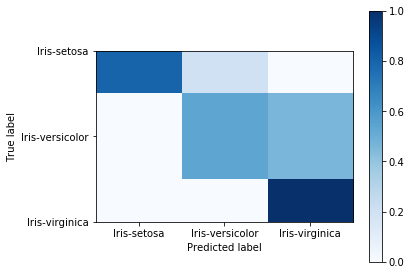

In [174]:
fig, ax = plt.subplots()
im = ax.imshow(cm_mean, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_mean.shape[1]),
       yticks=np.arange(cm_mean.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')
ax.set_ylim(ax.get_ylim()[0].round(), 0) # Required after the last update
fig.tight_layout()
plt.show()